### CONTEXT

__Predicting the percentage of marks that a student is expeted to score based upon the number of hours they studied. It involves only two variables: Scores and Hours.__

### IMPORTING THE LIBRARIES

In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### READING THE DATASET

In [39]:
df= pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [40]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [41]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


__The Score is dependant upon the Hours studied. Hence Score is the target variable and Hours is the predictor.__

### CHECKING FOR MISSING VALUES

In [42]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

__There is no missing value in the form of NaN values.__

### CHECKING FOR DUPLICATE ROWS

In [43]:
df.duplicated().sum()

0

__There are no duplicate rows and all the rows are unique.__

### UNDERSTANDING THE DATA TYPE OF VARIABLES

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### VISUALIZING THE DISTRIBUTION OF THE TARGET VARIABLE

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F60D44608>]],
      dtype=object)

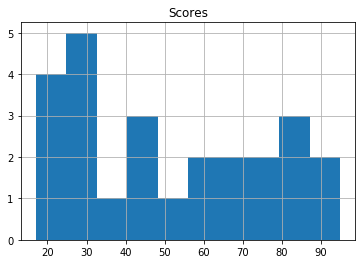

In [45]:
df.hist('Scores')

__Since the distribution does not show extreme skewness, predictive modeling can be conducted.__

In [46]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Scores')

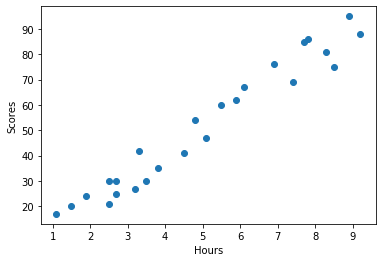

In [47]:
plt.scatter(x= df['Hours'],y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')

__There is a positive correlation between Scores and Hours because there is an upward sloping trend.__

### OUTLIER TREATMENT

In [48]:
df[(df['Hours']>8) & (df['Scores']<80)]

,Hours,Scores
3,8.5,75


__This point is looks farther away from the average data points so it is an outlier.__

In [49]:
df[(df['Hours']>8) & (df['Scores']<82)]

,Hours,Scores
3,8.5,75
8,8.3,81


In [50]:
df['Scores'][(df['Hours']>8) & (df['Scores']<80)]=81

C:\Users\AMRITA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Scores')

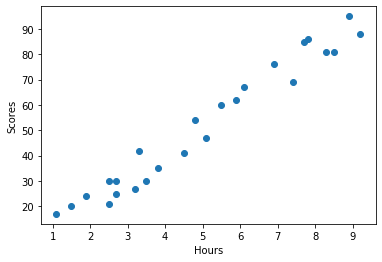

In [51]:
plt.scatter(x= df['Hours'],y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')

### SPLITTING THE DATASET INTO TRAIN AND TEST SET

In [52]:
Predictor=['Hours']
TargetVariable=['Scores']
x = df[Predictor].values
y = df[TargetVariable].values

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(17, 1) (8, 1) (17, 1) (8, 1)


### APPLYING DIFFERENT ALGORITHMS

In [54]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [55]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=10)

### BASELINE MODEL

#### LINEAR REGRESSION

In [56]:
lr.fit(x_train, y_train)
train_prediction= lr.predict(x_train)

print('The value of slope is: ',lr.coef_)
print('The value of Intercept is: ',lr.intercept_)

print('r-squared for training data:',r2_score(train_prediction , y_train))
test_prediction=lr.predict(x_test)
print('r-squared for testing data:',r2_score(test_prediction , y_test))

print('Accuracy (MAPE): ',100- (np.mean(np.abs((y_test - test_prediction) / y_test)) * 100))

The value of slope is:  [[9.88145866]]
The value of Intercept is:  [2.26138189]
r-squared for training data: 0.9612868280617797
r-squared for testing data: 0.945358289861064
Accuracy (MAPE):  87.87810299482919


In [57]:
import copy
df1=copy.deepcopy(df)
predicted_score=lr.predict(x)
df1['Predicted_Score']=predicted_score

Text(0, 0.5, 'Scores')

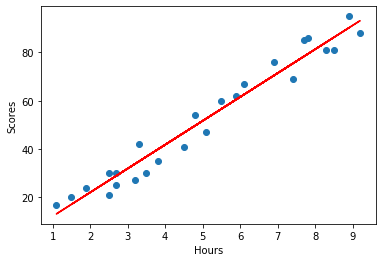

In [58]:
plt.scatter(x=df1['Hours'] , y=df1['Scores'])
plt.plot(df1['Hours'] , df1['Predicted_Score'],color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')

#### KNN (BASELINE)

In [59]:
knr.fit( x_train, y_train )
train_prediction = knr.predict(x_train)

print('r-squared for training data:',r2_score(train_prediction , y_train))
test_prediction=knr.predict(x_test)
print('r-squared for testing data:',r2_score(test_prediction , y_test))

print('Accuracy (MAPE): ',100- (np.mean(np.abs((y_test - test_prediction) / y_test)) * 100))

r-squared for training data: 0.5972815376563425
r-squared for testing data: 0.8097376523014829
Accuracy (MAPE):  81.11501969959598


__Since the accuracy is less than the baseline linear regression, we will reject the KNN Baseline model.__

### NORMALIZED

In [60]:
from sklearn.preprocessing import MinMaxScaler
PredictorScaler=MinMaxScaler()
TargetVarScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
x_normal=PredictorScalerFit.transform(x)
y_normal=TargetVarScalerFit.transform(y)


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_normal, y_normal, test_size=0.3, random_state=42)

#### LINEAR REGRESSION (NORMALIZED)

In [61]:
model= lr.fit(x_train, y_train)
train_prediction= model.predict(x_train)

print('The value of slope is: ',model.coef_)
print('The value of Intercept is: ',model.intercept_)

print('r-squared for training data:',r2_score(train_prediction , y_train))
test_prediction=model.predict(x_test)
print('r-squared for testing data:',r2_score(test_prediction , y_test))

print('Accuracy (MAPE): ',100- (np.mean(np.abs((y_test - test_prediction) / y_test)) * 100))

The value of slope is:  [[1.02615148]]
The value of Intercept is:  [-0.04960274]
r-squared for training data: 0.9612868280617798
r-squared for testing data: 0.945358289861064
Accuracy (MAPE):  64.14400188282528


__Since the accuracy is less than the baseline linear regression, we will reject this model.__

#### KNN (NORMALIZED)

In [62]:
knr.fit( x_train, y_train )
train_prediction = knr.predict(x_train)

print('r-squared for training data:',r2_score(train_prediction , y_train))
test_prediction=knr.predict(x_test)
print('r-squared for testing data:',r2_score(test_prediction , y_test))

print('Accuracy (MAPE): ',100- (np.mean(np.abs((y_test - test_prediction) / y_test)) * 100))

r-squared for training data: 0.5972815376563426
r-squared for testing data: 0.8097376523014829
Accuracy (MAPE):  34.635189863102966


__Since the accuracy is less than the baseline linear regression, we will reject the KNN (Normalized) model.__

### STANDARDIZED DATA

In [63]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
x_standard=PredictorScalerFit.transform(x)
y_standard=TargetVarScalerFit.transform(y)


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_standard, y_standard, test_size=0.3, random_state=42)


#### LINEAR REGRESSION (STANDARDIZED)

In [64]:
model= lr.fit(x_train, y_train)
train_prediction= model.predict(x_train)

print('The value of slope is: ',model.coef_)
print('The value of Intercept is: ',model.intercept_)

print('r-squared for training data:',r2_score(train_prediction , y_train))
test_prediction=model.predict(x_test)
print('r-squared for testing data:',r2_score(test_prediction , y_test))

print('Accuracy (MAPE): ',100- (np.mean(np.abs((y_test - test_prediction) / y_test)) * 100))

The value of slope is:  [[0.9767113]]
The value of Intercept is:  [0.00268684]
r-squared for training data: 0.9612868280617797
r-squared for testing data: 0.9453582898610638
Accuracy (MAPE):  63.82397608742961


__Since the Accuracy is less than the linear regression baseline modeL, we will reject this model.__

#### KNN (STANDARDIZED)

In [65]:
knr.fit( x_train, y_train )
train_prediction = knr.predict(x_train)

print('r-squared for training data:',r2_score(train_prediction , y_train))
test_prediction=knr.predict(x_test)
print('r-squared for testing data:',r2_score(test_prediction , y_test))

print('Accuracy (MAPE): ',100- (np.mean(np.abs((y_test - test_prediction) / y_test)) * 100))

r-squared for training data: 0.5972815376563425
r-squared for testing data: 0.809737652301483
Accuracy (MAPE):  63.73183257478981


__Since the Accuracy is less than the linear regression baseline modeL, we will reject this model.__

### The best model is the baseline linear regression because it has the highest accuracy.

#### Predicted score if a student studies for 9.25 hours a day

Predicted Score= 2.26138189 + 9.88145866 * Hours
 
=> Predicted Score= 2.26138189 + 9.88145866 * 9.25 = **93.66**